In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv("C:\\Users\\Prakhar Agrawal\\Downloads\\insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
dataset.shape

(1338, 7)

In [6]:
sns.set()
plt.figure(figsize = (8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

C:\Users\Prakhar Agrawal\AppData\Local\Temp\ipykernel_22400\2200208183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


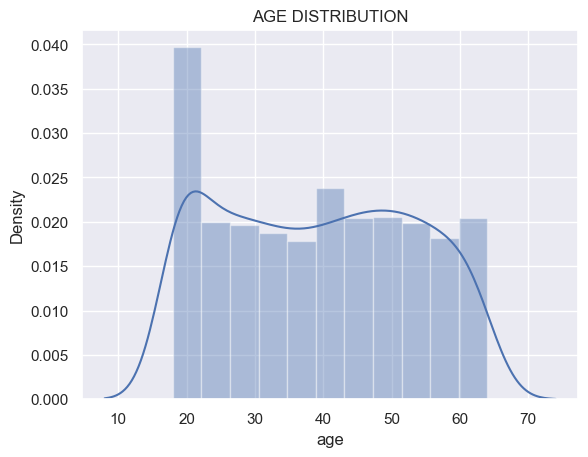

In [7]:
sns.distplot(dataset['age'])
plt.title('AGE DISTRIBUTION')
plt.show()

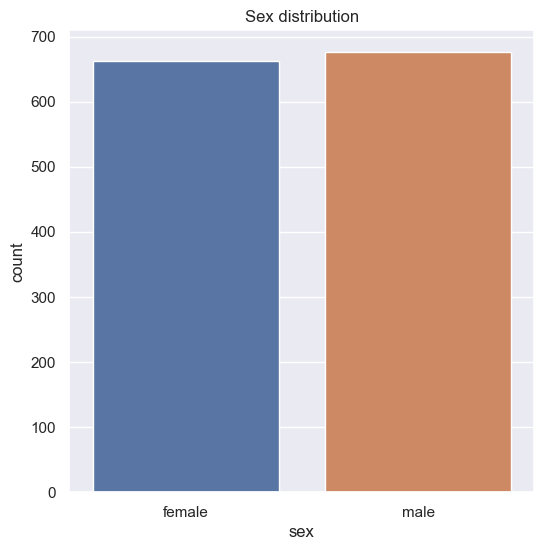

In [8]:
plt.figure(figsize = (6,6))
sns.countplot(x='sex', data=dataset)
plt.title('Sex distribution')
plt.show()

In [9]:
dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
labels = LabelEncoder()
dataset['sex'] = labels.fit_transform(dataset.sex)

In [11]:
dataset['smoker'] = labels.fit_transform(dataset.smoker)
dataset['region'] = labels.fit_transform(dataset.region)

In [12]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
X = dataset.drop(columns = 'charges' , axis = 1)
Y = dataset['charges']

In [14]:
models  = [LogisticRegression(max_iter=1000), SVC(kernel = 'linear') , LinearRegression(), KNeighborsClassifier(), RandomForestClassifier()]

In [15]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [16]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [19]:
regressor = LinearRegression()

In [20]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [22]:
training_data_prediction =regressor.predict(X_train)

In [23]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7519923667088932


In [24]:
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7445422986536503


In [30]:
input_data = (33,1,22.705,0,0,1)


input_data_as_numpy_array = np.asarray(input_data)

  # reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3698.51508856]
The insurance cost is USD  3698.5150885589264


C:\Users\Prakhar Agrawal\anaconda\envs\Machine_Learning\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
